In [38]:
from read_data import *
from hyper import *
from alignment import *
from copy import *
from datasets.preprecossing import *
import rpy2
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster import hierarchy
from math import sin,cos,pi
import scipy 
from sklearn.metrics import adjusted_rand_score

import seaborn as sns
argk=10
folder_path = './datas/lisan/'
# folder_path2 = './datas/ohss/'
subsize = 20
pcanum = 20
tempnum = 1000

In [8]:
datas = sc.read_h5ad("./datas/nature/151507_preprocessed.h5")
adata_subset = datas[:tempnum,:]
sc.write('./datas/nature/lisan.h5',adata_subset)
datas = sc.read_h5ad("./datas/nature/lisan.h5")
indices = np.random.choice(datas.n_obs, size=subsize, replace=False)


In [149]:
def sort_list_by_index(lst, index_lst):
    sorted_list = [None] * len(lst) 
    
    for i, index in enumerate(index_lst):
        sorted_list[index] = lst[i]  
    
    return sorted_list

# my_list = ['a', 'b', 'c', 'd', 'e']
# my_index_list = [3, 0, 4, 2, 1]

sorted_list = sort_list_by_index(labels2, ans_index)
print(sorted_list)

[3, 2, 3, 4, 4, 4, 4, 2, 1, 2, 4, 4, 2, 4, 3, 1, 1, 1, 2, 3, 4, 3, 3, 4, 3, 4, 4, 2, 1, 1, 4, 4, 4, 1, 1, 3, 1, 4, 3, 4, 2, 2, 3, 3, 4, 2, 2, 1, 2, 4, 2, 3, 1, 3, 4, 1, 4, 3, 1, 4, 3, 1, 2, 4, 1, 3, 3, 4, 1, 4, 4, 2, 3, 4, 1, 4, 3, 4, 2, 2, 3, 3, 2, 4, 4, 3, 1, 1, 4, 2, 1, 2, 3, 1, 2, 3, 3, 2, 2, 2, 3, 2, 1, 1, 3, 1, 4, 1, 2, 2, 4, 4, 3, 1, 3, 1, 2, 2, 3, 4, 4, 2, 3, 3, 1, 2, 4, 3, 3, 1, 3, 3, 1, 4, 1, 4, 3, 3, 3, 1, 2, 4, 1, 1, 1, 4, 1, 4, 1, 2, 4, 1, 2, 2, 2, 3, 4, 1, 3, 4, 4, 1, 2, 3, 1, 2, 1, 2, 1, 1, 1, 4, 1, 2, 3, 1, 4, 2, 3, 4, 4, 4, 4, 2, 4, 4, 2, 2, 3, 4, 2, 3, 4, 4, 4, 3, 1, 4, 2, 4, 2, 2, 3, 4, 4, 1, 2, 3, 4, 1, 4, 2, 1, 1, 2, 1, 2, 3, 2, 2, 4, 3, 4, 1, 4, 3, 4, 2, 1, 1, 3, 3, 1, 3, 1, 4, 1, 4, 4, 2, 2, 4, 4, 1, 4, 4, 3, 3, 4, 2, 4, 2, 2, 2, 3, 3, 3, 4, 2, 2, 2, 3, 1, 1, 4, 4, 4, 4, 2, 1, 2, 4, 4, 3, 4, 2, 2, 4, 1, 1, 3, 2, 3, 1, 4, 3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 2, 1, 4, 2, 4, 3, 3, 2, 3, 2, 2, 4, 4, 4, 3, 1, 1, 4, 4, 2, 4, 4, 2, 3, 3, 2, 1, 4, 2, 3, 3, 3, 2, 4, 1, 2, 2, 3, 

In [153]:
datas.obs['julei']= sorted_list
datas.obs

,in_tissue,array_row,array_col,imagerow,imagecol,sum_umi,sum_gene,subject,position,replicate,...,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_counts,julei
AAACAACGAATAGTTC-1,1,0,16,113.141318,147.434749,948,727,Br5292,0,1,...,727,6.590301,948.0,6.855409,22.362869,32.911392,44.409283,76.054852,914.0,3
AAACAAGTATCTCCCA-1,1,50,102,383.438357,413.051319,4261,2170,Br5292,0,1,...,2170,7.682943,4261.0,8.357493,24.994133,31.471486,40.154893,56.817648,4166.0,2
AAACAATCTACTAGCA-1,1,3,43,129.522957,231.008109,1969,1093,Br5292,0,1,...,1093,6.997596,1969.0,7.585789,34.128999,42.001016,52.158456,69.883189,1904.0,3
AAACACCAATAACTGC-1,1,59,19,431.188134,155.805586,3368,1896,Br5292,0,1,...,1896,7.548029,3368.0,8.122372,22.446556,29.928741,39.994062,58.491686,3229.0,4
AAACAGCTTTCAGAAG-1,1,43,9,344.869499,125.067511,2981,1620,Br5292,0,1,...,1620,7.390799,2981.0,8.000349,27.172090,34.149614,44.112714,62.428715,2909.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATTATTATGTCCGTCA-1,1,59,37,431.368152,211.566164,1170,772,Br5292,0,1,...,772,6.650279,1170.0,7.065613,30.854701,39.914530,51.111111,76.752137,1132.0,4
ATTATTCAGAGTCACT-1,1,67,97,475.022519,397.299744,3891,2091,Br5292,0,1,...,2091,7.645876,3891.0,8.266679,22.076587,29.067078,38.576201,56.206631,3803.0,2
ATTCAACCATTTAAGG-1,1,58,100,426.552670,406.750689,3492,1845,Br5292,0,1,...,1845,7.520776,3492.0,8.158516,26.116838,33.104238,43.069874,61.483391,3399.0,2
ATTCACTGATGTTGGA-1,1,56,68,415.481562,307.650776,4317,2194,Br5292,0,1,...,2194,7.693937,4317.0,8.370547,22.330322,29.279592,39.054899,55.733148,4232.0,2


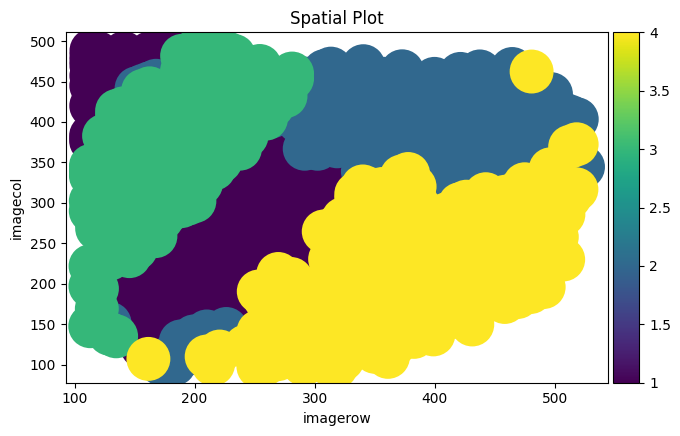

In [154]:
sc.pl.scatter(datas,'imagerow', 'imagecol', color='julei', title='Spatial Plot',size=4000)

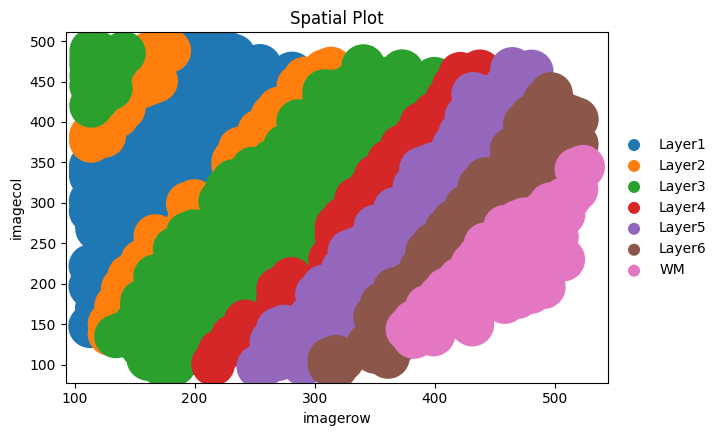

In [9]:
sc.pl.scatter(datas,'imagerow', 'imagecol', color='layer_guess_reordered', title='Spatial Plot',size=4000)

In [10]:
count_sub = datas.to_df()
xy_coords = pd.DataFrame(datas.obsm['spatial'],columns=['imagerow','imagecol'],index= datas.obs.index)
xy_coords.to_csv(folder_path+"xy.csv")
datas.obs.to_csv(folder_path+'meta_data.csv');
count_sub.T.to_csv(folder_path+"gene.csv")

In [11]:
# robjects.r("load(paste0('./datas/pca/DLPFC/LIBD_sample1.RData'))")
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects

Spatialpc  = importr('SpatialPCA')
ggplot2 = importr('ggplot2')
scran = importr('scran')
bluster = importr('bluster')
matrix = importr('Matrix')
robjects.r("xy_coords <- read.csv('{}',row.names='X')".format(folder_path + 'xy.csv'))
robjects.r("xy_coords=as.matrix(xy_coords)")
robjects.r("count_temp <- read.csv('{}',row.names='X')".format(folder_path + 'gene.csv'))
robjects.r('my_matrix <- do.call(cbind, count_temp)')
robjects.r('my_sparse_matrix <- Matrix(my_matrix, sparse = TRUE)')
robjects.r('count_sub <- as(my_sparse_matrix, "dgCMatrix")')
robjects.r('rownames(count_sub) <- rownames(count_temp)')
robjects.r("rownames(xy_coords) = colnames(count_sub)");
robjects.r('LIBD = CreateSpatialPCAObject(counts=count_sub, location=xy_coords, project = "SpatialPCA",gene.type="spatial",sparkversion="spark",numCores_spark=5,gene.number=3000, customGenelist=NULL,min.loctions = 20, min.features=20)')
robjects.r('LIBD = SpatialPCA_buildKernel(LIBD, kerneltype="gaussian", bandwidthtype="SJ",bandwidth.set.by.user=NULL)')
robjects.r('LIBD = SpatialPCA_EstimateLoading(LIBD,fast=FALSE,SpatialPCnum={})'.format(pcanum))
robjects.r('LIBD = SpatialPCA_SpatialPCs(LIBD, fast=FALSE)')
robjects.r('write.csv(as.data.frame(LIBD@SpatialPCs), file = "{}")'.format(folder_path + "pca.csv"))
robjects.globalenv.clear()



    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    ## Use SCTransform function in Seurat to normalize data. 


R[write to console]: Calculating cell attributes from input UMI matrix: log_umi

R[write to console]: Variance stabilizing transformation of count matrix of size 9917 by 1000

R[write to console]: Model formula is y ~ log_umi

R[write to console]: Get Negative Binomial regression parameters per gene

R[write to console]: Using 2000 genes, 1000 cells



  |======================================================================| 100%


R[write to console]: Found 22 outliers - those will be ignored in fitting/regularization step


R[write to console]: Second step: Get residuals using fitted parameters for 9917 genes



  |======================================================================| 100%


R[write to console]: Computing corrected count matrix for 9917 genes



  |======================================================================| 100%


R[write to console]: Calculating gene attributes

R[write to console]: Wall clock passed: Time difference of 14.36548 secs

R[write to console]: Determine variable features

R[write to console]: Place corrected count matrix in counts slot

R[write to console]: Centering data matrix

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |=====                                                                 |   7%
  |                                                                            
  |==========                                                            |  14%
  |                                                                            
  |===============                                                       |  21%
  |                                                                         

## Use spark.test function in SPARK package to select spatially variable genes. 
## ===== SPARK INPUT INFORMATION ==== 
## number of total samples:  1000 
## number of total features:  4119 
## number of adjusted covariates:  0 
# fitting normalized count-based spatial model under the null hypothesis ... 
## testing Gaussian kernel: 1...
## testing Periodic kernel: 1...
## testing Gaussian kernel: 2...
## testing Periodic kernel: 2...
## testing Gaussian kernel: 3...
## testing Periodic kernel: 3...
## testing Gaussian kernel: 4...
## testing Periodic kernel: 4...
## testing Gaussian kernel: 5...
## testing Periodic kernel: 5...
## Identified  295  spatial genes through spark.test function. 
The  number of significant spatial genes is less than the specified number of spatial genes. 
## Using  295  significant spatially variable genes. 
## Selected kernel type is:  gaussian  
## The bandwidth is:  0.0793834656303859  
## Calculating kernel matrix
## Finished calculating kernel matrix.


In [12]:
adata1 = pd.read_csv(folder_path + 'pca.csv')
adata1 = adata1.set_index(adata1.columns[0])
adata1 = adata1.T
adata1.index = datas.obs.layer_guess_reordered
adata1
# adata1.to_csv(folder_path+'datas.data',header=None);
# adata1.to_csv(folder_path+'datas.csv')

Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
layer_guess_reordered,,,,,,,,,,,,,,,,,,,,
Layer1,-2.964958,-0.443682,-0.127157,-0.550023,0.357146,-2.019074,-1.143631,1.314798,-2.311385,0.250460,-1.603056,3.261195,0.114826,0.254280,0.400208,1.065781,-0.912067,-0.057919,-0.235414,-0.545529
Layer3,3.922670,-0.163161,0.599635,0.886643,1.039973,1.598607,-0.450928,-0.425725,-0.762643,-0.149263,0.925994,-0.369788,0.215386,-1.140284,-0.477412,0.399940,0.467753,0.062338,0.838355,0.133995
Layer1,-4.159250,7.455989,-1.585604,2.971580,-0.732256,-0.748337,-0.315529,-1.897905,-1.442151,1.182143,0.647268,0.004126,0.565807,0.824697,0.499902,-0.578875,-0.129451,0.479470,1.161956,0.638118
WM,-11.135783,-5.694550,-2.836121,-2.053079,2.184414,0.237465,0.286835,-0.361176,0.158150,0.398960,-0.005143,-1.991437,-0.068070,0.344343,-1.637242,-0.435950,0.222663,-0.203762,0.385872,-1.071332
Layer6,1.070935,-1.587744,-0.007008,-0.531028,-1.560630,-0.656481,-2.331968,0.016995,-0.087082,-1.262035,0.137890,-0.362345,-1.106963,0.764147,-1.723261,0.908204,-0.149213,-1.290585,-0.207290,-1.121098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WM,-5.205209,-3.112869,-1.250179,-0.984360,0.616819,0.275942,-0.371127,-0.454230,-0.310693,-0.588396,1.223143,2.365099,1.456910,-0.725941,1.807047,-0.637214,1.118682,-0.821894,1.279800,0.901763
Layer6,0.004318,-4.455804,1.179770,0.049381,-2.407912,-0.254855,0.339173,-0.376891,0.268053,0.557686,1.009514,-0.333847,-0.484829,-0.416200,0.704410,0.043383,1.166264,-0.157042,-0.117816,1.014068
Layer5,1.290302,-1.351651,1.802553,0.521413,0.102162,0.790476,1.189263,1.541071,0.106984,-0.756747,1.065235,-0.456077,0.591353,-0.397874,0.023774,0.696745,0.344781,0.405003,-1.301847,-0.483848


In [13]:
from scipy.spatial import KDTree
ans_value = []
ans_label = []
true_label = [];
ans_index = [];
now_labels = datas.obs.layer_guess_reordered.tolist();
now_index = [i for i in range(len(datas))];
r= 2
now_label = 0;
now =  adata1.values;
while len(now) != 0:
    rnd = np.random.randint(now.shape[0], size=1);
    rand_choice = now[rnd, :].reshape(-1)
    tree = KDTree(now);
    indices = tree.query_ball_point(rand_choice,r)
    points_within_k = now[indices]
    now = now.tolist();

    for i in points_within_k:
        ans_value.append(i.tolist())
        ans_label.append(now_label);
        index = now.index(i.tolist());
        true_label.append(now_labels[index]);
        ans_index.append(now_index[index]);
        now.pop(index)
        now_labels.pop(index)
        now_index.pop(index)
    now_label+=1;
        
    now = np.array(now);
    print("remain length: {}".format(len(now)))
        
        
np.save(folder_path+'r_{}_label.npy'.format(r),np.array(ans_label))
np.save(folder_path+'r_{}_value.npy'.format(r),np.array(ans_value))



remain length: 996
remain length: 989
remain length: 988
remain length: 984
remain length: 978
remain length: 974
remain length: 973
remain length: 970
remain length: 968
remain length: 961
remain length: 958
remain length: 954
remain length: 949
remain length: 948
remain length: 947
remain length: 944
remain length: 937
remain length: 935
remain length: 932
remain length: 928
remain length: 924
remain length: 919
remain length: 917
remain length: 915
remain length: 913
remain length: 910
remain length: 907
remain length: 905
remain length: 903
remain length: 901
remain length: 899
remain length: 898
remain length: 894
remain length: 890
remain length: 886
remain length: 884
remain length: 881
remain length: 878
remain length: 876
remain length: 874
remain length: 871
remain length: 868
remain length: 865
remain length: 864
remain length: 863
remain length: 861
remain length: 857
remain length: 856
remain length: 853
remain length: 850
remain length: 843
remain length: 841
remain lengt

In [16]:
adata1.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20],
           dtype='int64', name='Unnamed: 0')

In [105]:
v = pd.DataFrame(ans_value)
v['label'] = ans_label
ann  = v.groupby("label").mean()
ann.columns = adata1.columns
ann.T.to_csv(folder_path +'annT.csv',index=None)
ann

Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
label,,,,,,,,,,,,,,,,,,,,
0,-0.637017,-3.761666,2.472726,-0.029959,-0.961210,1.639221,-1.360123,0.208320,0.976473,1.524932,-0.523435,0.327094,0.842122,-0.264441,0.443934,0.259029,-1.161676,0.475882,-0.816753,-0.192810
1,3.135264,-0.380552,1.291586,0.146611,0.816918,1.166526,0.080652,-0.617255,0.027299,-0.319956,0.724084,-0.285387,-0.013586,0.313411,0.004322,0.617724,-1.095062,-0.500627,0.495032,-0.536090
2,-7.721490,-4.317423,0.758488,-1.937357,2.337619,-0.621116,-2.424020,0.463123,-0.682666,0.157126,0.365606,2.243275,1.110989,-0.051571,0.513874,1.647474,0.206327,0.186266,2.257131,1.587510
3,0.520848,-2.950717,3.065439,1.562681,-0.100580,0.238658,2.215817,-1.821918,0.820552,1.081110,-0.008000,-1.606315,0.298615,-0.290160,0.669847,-0.147656,-0.038159,0.138784,0.680069,-0.268527
4,1.395184,-2.326356,-0.867740,1.380162,-1.925509,-0.240684,-0.347372,0.209628,0.850483,-2.066434,0.306661,1.443061,-0.518201,1.534874,-0.925613,0.325230,0.322495,0.108503,-0.310688,-0.460052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,-2.212480,-2.510200,-1.248033,-0.113761,-1.769597,0.977825,-2.637749,-0.072420,0.549361,-1.539443,0.210369,1.140682,-1.560165,0.601994,-0.944272,-0.843338,-0.669159,0.833211,-0.525175,-0.292925
473,3.290176,3.382806,-1.206629,-2.924299,-1.277149,0.491345,0.462462,-0.095215,0.828496,0.869459,-0.915528,-0.950580,-0.867846,-0.119577,0.431095,0.433190,1.617416,0.816156,0.762349,0.487058
474,1.829053,-2.390991,0.417237,1.040772,0.049630,1.055611,0.070166,0.613676,-0.751428,0.538048,-1.127653,0.715562,-0.128325,-1.142821,0.551085,-0.046818,0.698465,0.378770,-0.939545,-0.142402


In [101]:
v1 = pd.DataFrame(true_label)
v1['label'] = ans_label
meta = v1.groupby("label").max()
loss1 = 1-(v1.groupby("label").describe()[0]['count'] - v1.groupby("label").describe()[0]['freq']).sum() / (v1.groupby("label").describe()[0]['count'].sum())
# v1['ori_index'] = ans_index
meta.to_csv(folder_path + "meta.csv")
meta

,0
label,
0,Layer5
1,Layer3
2,WM
3,Layer5
4,Layer6
...,...
472,Layer6
473,Layer2
474,Layer5


In [148]:
labels1 = v1[0].tolist()
labels2 = [];
for i in range(len(v1)):
    temp = meta1.T[v1.iloc[i]['label'] +1][0];
    labels2.append(temp)
ari = adjusted_rand_score(labels1, labels2)
print("ARI score for adata1: ", ari)

ARI score for adata1:  0.39293331364514145


In [129]:
meta1.T[1][0]

2

In [58]:
v2 = pd.DataFrame(ans_label)
v2['indexs'] = ans_index
v2

,0,indexs
0,0,152
1,0,806
2,0,783
3,0,944
4,1,954
...,...,...
995,472,5
996,473,795
997,474,800
998,475,91


In [94]:
result = v2.groupby(v2.columns[0]).agg({'indexs': list})
scores = []
for i in range(len(result)):
    xys = [];
    score = 0;
    l = result.iloc[i][0]
    for j in l:
        xys.append(datas.obsm['spatial'][j])
    xys = np.array(xys)
    # print(xys)
    center = xys.mean(0);
    for j in xys:
        score += np.linalg.norm(j-center)
    score = score/len(xys);
    scores.append(score)
print(np.array(scores).mean())
scores

[7.802177762845962,
 7.885978664905614,
 0.0,
 6.506629892593824,
 6.325423086707258,
 5.803478568343336,
 0.0,
 3.585566570626579,
 3.082890510909787,
 8.386951069514275,
 6.186193001694826,
 8.311527935791027,
 7.87510049742702,
 0.0,
 0.0,
 4.3402420162123105,
 11.73802439892143,
 3.1148350294331495,
 6.183819394371031,
 4.726305361126882,
 5.875322095867595,
 5.472365114347238,
 3.10531063800002,
 3.1053106379999917,
 3.095348009492268,
 3.580081000604633,
 4.337939592838588,
 3.114835029433153,
 3.106696337039903,
 5.400540239999998,
 5.378085064632856,
 0.0,
 4.729266924896926,
 4.7362857013986135,
 8.552836657986818,
 3.0953480094922554,
 6.906955102591971,
 5.676282640834884,
 3.114835029433171,
 3.1053921668246782,
 3.580081000604633,
 4.341250370547469,
 6.751884598760163,
 0.0,
 0.0,
 5.372810029846547,
 6.492158780229566,
 0.0,
 4.150658730703984,
 3.5726119724916643,
 7.520871664131698,
 3.114835029433146,
 4.731685578391083,
 0.0,
 3.126112616540416,
 3.082890510909787,
 

In [141]:
print(np.array(scores).mean())


2.7677222225698133


In [113]:
Spatialpc  = importr('SpatialPCA')
ggplot2 = importr('ggplot2')
scran = importr('scran')
bluster = importr('bluster')
matrix = importr('Matrix')
# igraph = importr('igraph')
robjects.r(" xys <- read.csv('{}')".format(folder_path+'annT.csv'));
robjects.r("g <- buildSNNGraph(xys,k={})".format(argk))
robjects.r("walktrap <- walktrap.community(g)")
robjects.r("clusters <- membership(walktrap)")
robjects.r("write.csv(clusters,file='{}')".format(folder_path+'cluster.csv'))
robjects.globalenv.clear()


In [123]:
meta1 = pd.read_csv(folder_path+'cluster.csv')
meta1 = meta1.set_index(meta1.columns[0])
meta1['x'].tolist()
ari = adjusted_rand_score(meta1['x'].tolist(), meta[0].tolist())
print("ARI score for adata1: ", ari)

ARI score for adata1:  0.4032542586404715


In [46]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def construct_snn_graph(X, t):
    # 计算共享最近邻相似度
    neigh = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')
    neigh.fit(X)
    _, indices = neigh.kneighbors(X)
    S = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(i+1, X.shape[0]):
            s = len(set(indices[i]) & set(indices[j]))
            S[i,j] = S[j,i] = s
            print(s);
    # 构造SNN Graph
    W = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(i+1, X.shape[0]):
            if S[i,j] >= t:
                W[i,j] = W[j,i] = S[i,j]
    # 计算节点度
    D = np.sum(W, axis=1)
    # 返回SNN Graph
    return W, D

In [40]:
import numpy as np
import networkx as nx

def walktrap(G, k):
    # 转化为无向图
    G = G.to_undirected()
    # 节点数
    N = G.number_of_nodes()
    # 初始化权重矩阵
    W = np.zeros((N,N))
    # 计算节点之间的相似度
    for i in range(N):
        for j in range(i+1,N):
            W[i,j] = W[j,i] = nx.shortest_path_length(G, i, j)
    # 计算相似矩阵
    S = np.exp(-W/k)
    # 初始化社区
    communities = [[i] for i in range(N)]
    # 迭代聚类过程
    while len(communities) > 1:
        # 计算社区之间的相似度
        Q = np.zeros((len(communities), len(communities)))
        for i in range(len(communities)):
            for j in range(i+1, len(communities)):
                q = 0
                for u in communities[i]:
                    for v in communities[j]:
                        q += S[u,v]
                Q[i,j] = Q[j,i] = q
        # 合并相似度最大的两个社区
        i, j = np.unravel_index(Q.argmax(), Q.shape)
        communities[i] += communities[j]
        del communities[j]
    # 返回社区划分结果
    return communities

./datas/miss/datas.data length:180
Generating all pairs superset


100%|██████████| 1563/1563 [01:06<00:00, 23.47ex/s, loss=0.942357] 


	 Epoch 0 | average train loss: 0.895025
Optimization finished.


100%|██████████| 1563/1563 [01:06<00:00, 23.62ex/s, loss=0.875078] 


	 Epoch 1 | average train loss: 0.807154
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.77ex/s, loss=0.808951] 


	 Epoch 2 | average train loss: 0.796907
Optimization finished.


100%|██████████| 1563/1563 [01:04<00:00, 24.21ex/s, loss=0.910374] 


	 Epoch 3 | average train loss: 0.792815
Optimization finished.


100%|██████████| 1563/1563 [01:04<00:00, 24.37ex/s, loss=0.870321] 


	 Epoch 4 | average train loss: 0.791253
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.88ex/s, loss=0.771963] 


	 Epoch 5 | average train loss: 0.790972
Optimization finished.


100%|██████████| 1563/1563 [01:04<00:00, 24.17ex/s, loss=0.949714] 


	 Epoch 6 | average train loss: 0.790738
Optimization finished.


100%|██████████| 1563/1563 [01:07<00:00, 23.21ex/s, loss=0.760655] 


	 Epoch 7 | average train loss: 0.790817
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 24.01ex/s, loss=0.723801] 


	 Epoch 8 | average train loss: 0.790755
Optimization finished.


100%|██████████| 1563/1563 [01:04<00:00, 24.20ex/s, loss=0.801402] 


	 Epoch 9 | average train loss: 0.790883
Optimization finished.


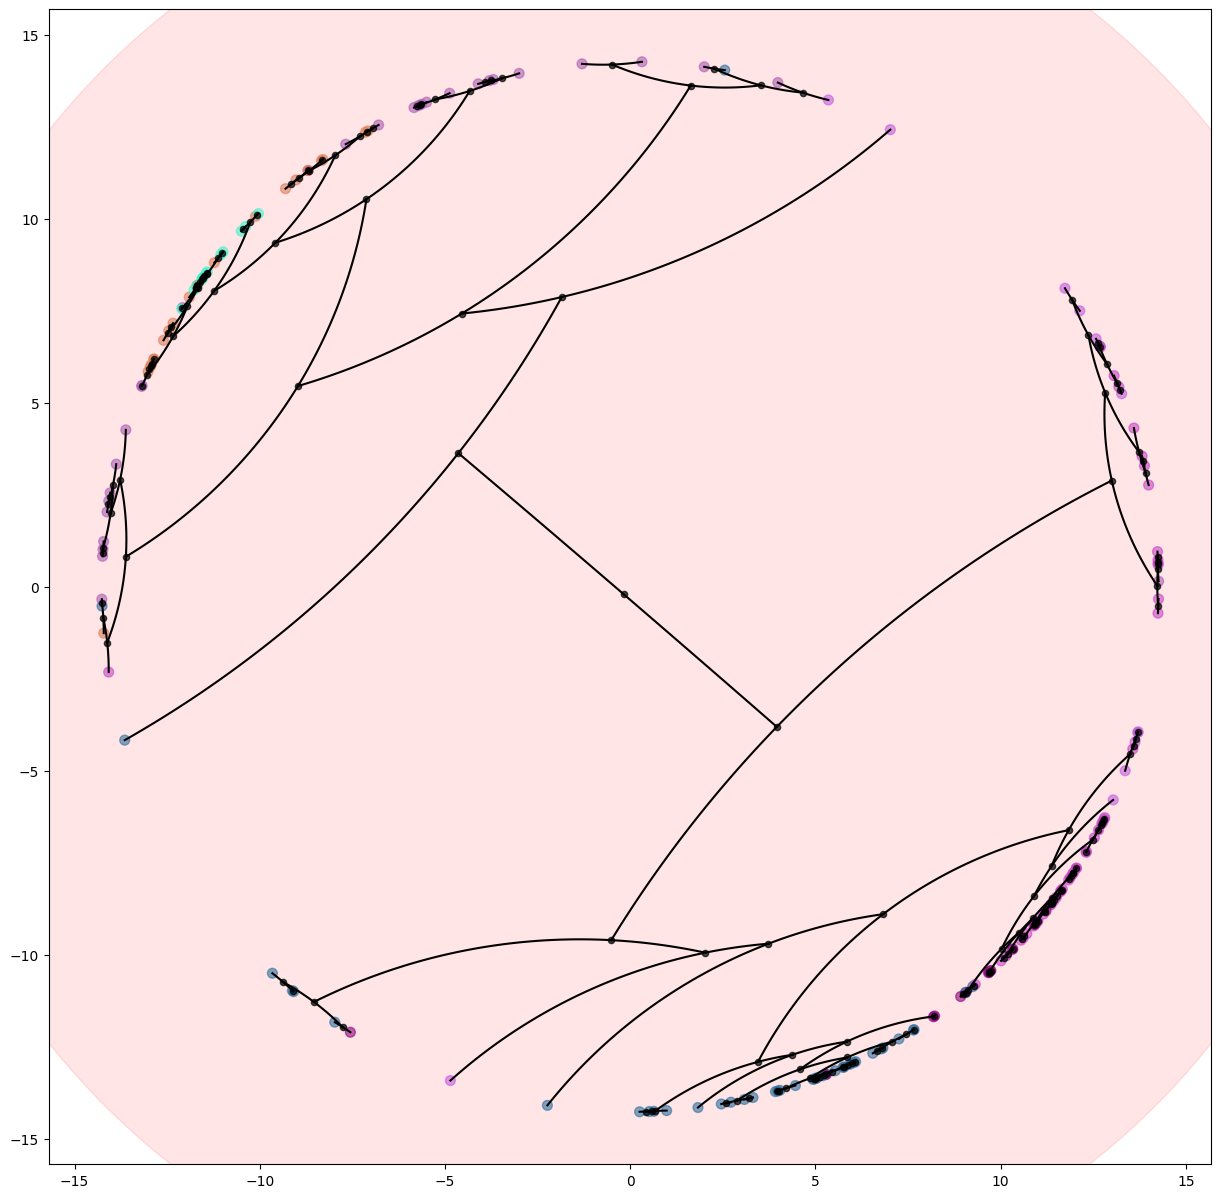

In [30]:
get_Hyper_tree(folder_path+'datas.data',1,adata1.shape[1]+1,0,10,model_path=None,save_path=folder_path,c=-1)


In [75]:
def search_tree(now,c,merge_list):
    if(len(now.son) != 2):
        return now;
    lson = search_tree(now.son[0],c,merge_list);
    now.son[0] = lson;
    rson = search_tree(now.son[1],c,merge_list);
    now.son[1] = rson

    if(np.linalg.norm(lson.value-rson.value)<=c):
        if(len(lson.son)>1 and len(rson.son)>1):
            pass
        elif(len(lson.son)>1):
            merge_list.append((rson.name,lson.name))
            print(rson.name,lson.name)
            now = rson;
            now.son.append(lson);
        else:
            merge_list.append((rson.name,lson.name))
            print(rson.name,lson.name)
            now = lson;
            now.son.append(rson)
    return now;

In [101]:
def search_miss_node(now,anslist,smalllist,n):
    if(len(now.son) == 0):
        return now;
    if(len(now.son)==1):
        search_miss_node(now.son[0],anslist,smalllist,n);
        return now;
    lson = search_miss_node(now.son[0],anslist,smalllist,n);
    rson = search_miss_node(now.son[1],anslist,smalllist,n);
    if((int(lson.name)<n and int(rson.name)>n )):
        smalllist.append(int(lson.name))
        anslist.append((lson,rson));
    elif (int(lson.name)>n and int(rson.name)<n ):
        smalllist.append(int(rson.name))
        anslist.append((lson,rson));
    return now
nodes1,n1 = build_hyper_tree(folder_path)
# show_tree(nodes1[0]).show_fig()
anslist = [];
mergelist= []
smalllist = []
search_tree(nodes1[0],2,mergelist)
search_miss_node(nodes1[0],anslist,smalllist,(n1+1)/2)
len(anslist),len(mergelist)

170 109
109 52
52 6
144 122
122 91
91 167
167 322
72 22
172 17
178 25
25 17
17 22
138 11
11 89
89 134
134 22
177 152
161 61
24 10
179 174
174 67
67 10
10 61
114 29
162 80
80 96
76 3
3 96
132 57
57 182
57 63
63 96
165 5
5 28
28 268
129 77
77 36
100 55
55 12
12 169
169 36
36 9
173 0
0 160
160 111
111 9
131 88
166 98
98 88
142 43
43 88
350 81
81 175
154 83
86 38
38 37
37 42
303 83
158 147
147 163
163 1
105 8
8 65
99 71
71 136
136 65
337 1
75 53
145 13
13 171
171 53
155 2
2 106
106 101
139 16
78 21
87 56
56 73
73 275
90 60
137 66
66 60
186 168
168 60
116 110
140 32
32 20
20 110
110 23
23 168
120 119
119 159
159 74
74 23
319 16
102 51
62 31
146 126
126 31
31 54
54 150
150 51
82 49
69 35
35 151
151 49
148 95
133 26
26 93
93 95
113 97
97 193
176 143
103 30
149 130
130 30
30 143
232 121
156 92
124 58
58 112
112 92
153 115
128 118
85 48
48 44
44 15
15 223
15 115
270 121
310 70
108 27
127 64
64 27
27 104
336 18
18 157
357 175


(38, 138)

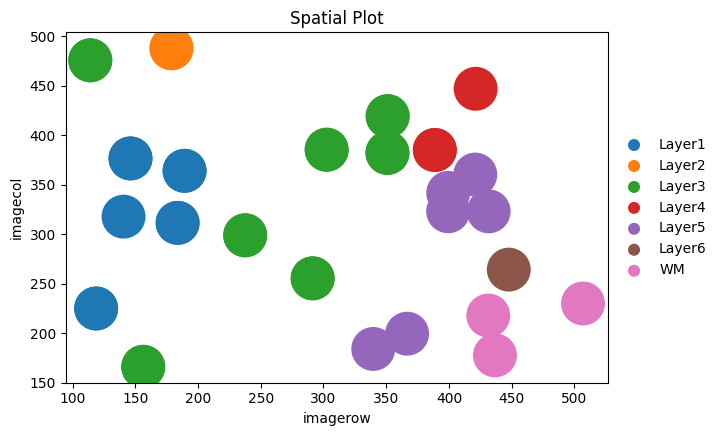

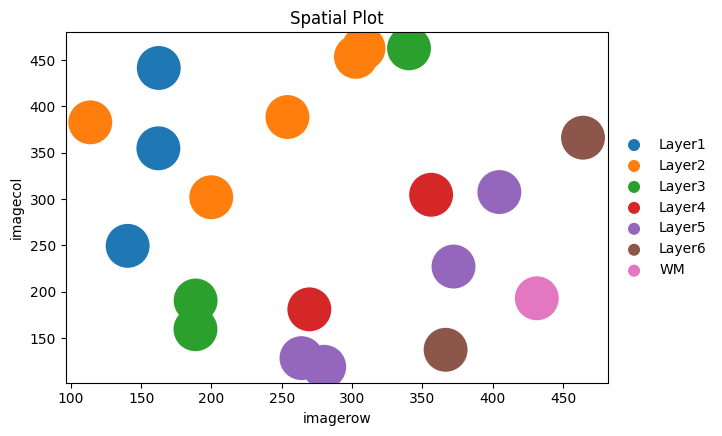

In [102]:
rest[smalllist,:]
sc.pl.scatter(rest[smalllist,:],'imagerow', 'imagecol', color='layer_guess_reordered', title='Spatial Plot',size=4000)
sc.pl.scatter(subset,'imagerow', 'imagecol', color='layer_guess_reordered', title='Spatial Plot',size=4000)

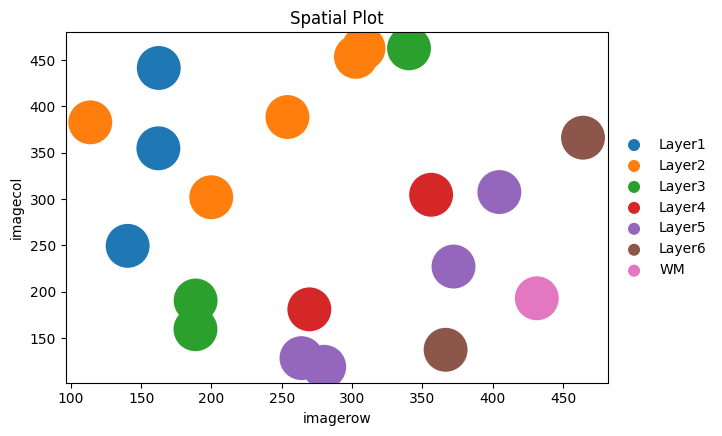

array([111, 136,  61, 134,  62, 128, 135, 114,  25,  28,   5,  98,  99,
       127,  86,  75,  48, 133, 182, 167])

In [66]:
smalllist

[52,
 6,
 135,
 91,
 167,
 89,
 134,
 67,
 164,
 96,
 63,
 34,
 28,
 36,
 12,
 169,
 9,
 160,
 111,
 81,
 175,
 37,
 42,
 45,
 163,
 1,
 65,
 136,
 171,
 106,
 101,
 39,
 73,
 168,
 20,
 23,
 159,
 74,
 94,
 54,
 150,
 151,
 121,
 112,
 14,
 44,
 15,
 70,
 104,
 18,
 157]